In [ ]:
############### Factors Affecting London Hosue Prices - Correlation between variables

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt2
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
import plotly.express as px 


In [3]:
#Load the month wise data 
dataLondon = pd.read_csv('London_House_Price_MonthWise.csv', parse_dates = ['date'])
dataLondon.head()

#finding whther there is any missing values in the dataset.
empy_dataLondon = dataLondon.isnull().sum().sort_values(ascending=False)
empty_values_percentage = (dataLondon.isnull().sum()/dataLondon.isnull().count()).sort_values(ascending = False)*100
empy_dataLondon = pd.concat([empy_dataLondon, empty_values_percentage], axis = 1 , keys = ['Total number of values missing', 'Percentage of values missing'])
print('Below are the details of values missing in the dataframe')
empy_dataLondon

# we have to drop the crimes column
dataLondon.drop('no_of_crimes', axis = 1, inplace = True)   

# fill NaN values in the houses_sold column with the mean 
dataLondon['houses_sold'].fillna(dataLondon.groupby('area')['houses_sold'].transform('mean'), inplace = True) 

# Extract the date from the datetime column for analysing the details based on year
dataLondon['year'] = dataLondon['date'].dt.year
dataLondon.iloc[[0, -1]]
print('The starting year in the dataset is Jan 1995 and the end year is Jan 2020. All the months in the year 2020 are not there in dataset. So we have to avoid the year.')
      
#Discard 2020 from the analysis
dataLondon = dataLondon[dataLondon['year'] < 2020]
dataLondon['year'].max()

borough_count = dataLondon[dataLondon['borough_flag'] == 1]['area'].unique()
print('Total number of boroughs are: ' + str(len(borough_count)))

#Here consider the regions which are outside of the London area
out_London= dataLondon[dataLondon['borough_flag'] == 0]['area'].nunique()

out_London_regions= dataLondon[dataLondon['borough_flag'] == 0]['area'].unique()

print('Total number of regions outside London are: ' + str(out_London))
print('Regions outside London are : ')
print(out_London_regions)

# Get boroughs of London
bor_London = dataLondon[dataLondon['area'].isin(borough_count)]

Below are the details of values missing in the dataframe
The starting year in the dataset is Jan 1995 and the end year is Jan 2020. All the months in the year 2020 are not there in dataset. So we have to avoid the year.
Total number of boroughs are: 33
Total number of regions outside London are: 12
Regions outside London are : 
['south east' 'inner london' 'outer london' 'north east' 'north west'
 'yorks and the humber' 'east midlands' 'west midlands' 'east of england'
 'london' 'south west' 'england']


In [4]:
#display data
bor_London

,date,area,average_price,code,houses_sold,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.00000,1,1995
1,1995-02-01,city of london,82203,E09000001,7.00000,1,1995
2,1995-03-01,city of london,79121,E09000001,14.00000,1,1995
3,1995-04-01,city of london,77101,E09000001,7.00000,1,1995
4,1995-05-01,city of london,84409,E09000001,10.00000,1,1995
...,...,...,...,...,...,...,...
9932,2019-08-01,westminster,914870,E09000033,156.00000,1,2019
9933,2019-09-01,westminster,925955,E09000033,169.00000,1,2019
9934,2019-10-01,westminster,927864,E09000033,168.00000,1,2019
9935,2019-11-01,westminster,955615,E09000033,150.00000,1,2019


In [6]:
#Load the year wise data 
dataLondonYear = pd.read_csv('London_House_Price_YearWise.csv', parse_dates = ['date'])
dataLondonYear.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [7]:
#Select only London boroughs
dataLondonYear = dataLondonYear[dataLondonYear['borough_flag']==1]
dataLondonYear.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [8]:
#print result
print ('The dataset has {} rows and {} columns.'.format(dataLondonYear.shape[0], dataLondonYear.shape[1]))
dataLondonYear.head()

The dataset has 693 rows and 12 columns.


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


In [9]:
#Get the important information about all the attributes in the dataset
dataLondonYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 1052
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   code               693 non-null    object        
 1   area               693 non-null    object        
 2   date               693 non-null    datetime64[ns]
 3   median_salary      683 non-null    float64       
 4   life_satisfaction  256 non-null    float64       
 5   mean_salary        693 non-null    object        
 6   recycling_pct      660 non-null    object        
 7   population_size    660 non-null    float64       
 8   number_of_jobs     627 non-null    float64       
 9   area_size          594 non-null    float64       
 10  no_of_houses       594 non-null    float64       
 11  borough_flag       693 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 70.4+ KB


In [10]:
#finding whther there is any missing values in the dataset.
empy_dataLondonYear = dataLondonYear.isnull().sum().sort_values(ascending=False)
empty_values_percentage_Year = (dataLondonYear.isnull().sum()/dataLondonYear.isnull().count()).sort_values(ascending = False)*100
empy_dataLondonYear = pd.concat([empy_dataLondonYear, empty_values_percentage_Year], axis = 1 , keys = ['Total number of values missing', 'Percentage of values missing'])
print('Below are the details of values missing in the dataframe')
empy_dataLondonYear



Below are the details of values missing in the dataframe


,Total number of values missing,Percentage of values missing
life_satisfaction,437,63.059163
area_size,99,14.285714
no_of_houses,99,14.285714
number_of_jobs,66,9.523810
recycling_pct,33,4.761905
population_size,33,4.761905
median_salary,10,1.443001
code,0,0.000000
area,0,0.000000
date,0,0.000000


In [11]:
#convert mean salary into numeric
dataLondonYear[~dataLondonYear['mean_salary'].str.isnumeric()]['mean_salary'].value_counts()

#    7
Name: mean_salary, dtype: int64

In [12]:
#replace special characters
dataLondonYear['mean_salary'] = dataLondonYear['mean_salary'].replace(['#'], np.NaN)
dataLondonYear['mean_salary'] = dataLondonYear['mean_salary'].astype(float)

In [202]:
#find information of the dataset
dataLondonYear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 0 to 1052
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   code               693 non-null    object        
 1   area               693 non-null    object        
 2   date               693 non-null    datetime64[ns]
 3   median_salary      683 non-null    float64       
 4   life_satisfaction  256 non-null    float64       
 5   mean_salary        686 non-null    float64       
 6   recycling_pct      660 non-null    object        
 7   population_size    660 non-null    float64       
 8   number_of_jobs     627 non-null    float64       
 9   area_size          594 non-null    float64       
 10  no_of_houses       594 non-null    float64       
 11  borough_flag       693 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 70.4+ KB


In [16]:
#check the start and end year of the dataset
dataLondonYear['year'] = dataLondonYear['date'].dt.year

print ('\tStart date is: ', dataLondonYear['year'].min())
print ('\tEnd date is: ', dataLondonYear['year'].max())

	Start date is:  1999
	End date is:  2019


In [19]:
#start year in the datset is different in monthly data and yearly data. So we have to merge to avoid the mismatch


lon_data_m = bor_London.groupby(['area', 'year']).mean().reset_index()  # group based on area and year (take mean)
lon_data_m = lon_data_m[lon_data_m['year'] >= 1999]            # select all years after 1999 (included)

print ('Dataset with monthly data')
print ('\tFirst date: ', lon_data_m['year'].min())
print ('\tFinal date: ', lon_data_m['year'].max())

Dataset with monthly data
	First date:  1999
	Final date:  2019


In [20]:
#group by based on borough and year
lon_data_y = dataLondonYear.groupby(['area', 'year']).mean().reset_index() 
lon_data_y.head()

,area,year,median_salary,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,barking and dagenham,1999,21480.0,NaN,23620.0,162444.0,NaN,NaN,NaN,1
1,barking and dagenham,2000,22618.0,NaN,24696.0,163893.0,57000.0,NaN,NaN,1
2,barking and dagenham,2001,22323.0,NaN,26050.0,165654.0,54000.0,3780.0,68298.0,1
3,barking and dagenham,2002,24813.0,NaN,26653.0,166357.0,52000.0,3780.0,68526.0,1
4,barking and dagenham,2003,25358.0,NaN,27792.0,166210.0,55000.0,3780.0,68837.0,1


In [21]:
#merge the two datasets for the further analysis
london_ds_final = pd.merge(lon_data_y, lon_data_m, on = ['area', 'year'], how = 'left')

#drop the borough column
london_ds_final.drop(['borough_flag_x', 'borough_flag_y'], axis = 1, inplace = True)

#display
london_ds_final.head()

,area,year,median_salary,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,no_of_houses,average_price,houses_sold
0,barking and dagenham,1999,21480.0,NaN,23620.0,162444.0,NaN,NaN,NaN,65320.833333,223.833333
1,barking and dagenham,2000,22618.0,NaN,24696.0,163893.0,57000.0,NaN,NaN,77549.500000,234.416667
2,barking and dagenham,2001,22323.0,NaN,26050.0,165654.0,54000.0,3780.0,68298.0,88664.000000,266.916667
3,barking and dagenham,2002,24813.0,NaN,26653.0,166357.0,52000.0,3780.0,68526.0,112221.916667,287.416667
4,barking and dagenham,2003,25358.0,NaN,27792.0,166210.0,55000.0,3780.0,68837.0,142499.000000,301.250000


In [22]:
#avoid rows in the year 2020 beacuse it doesn.t contains all the months in 2020.
london_ds_Filter = london_ds_final[(london_ds_final['year'] < 2020)]

In [23]:
london_ds_Filter.shape

(693, 11)

In [25]:
#display
london_ds_Filter

,area,year,median_salary,life_satisfaction,mean_salary,population_size,number_of_jobs,area_size,no_of_houses,average_price,houses_sold
0,barking and dagenham,1999,21480.0,NaN,23620.0,162444.0,NaN,NaN,NaN,6.532083e+04,223.833333
1,barking and dagenham,2000,22618.0,NaN,24696.0,163893.0,57000.0,NaN,NaN,7.754950e+04,234.416667
2,barking and dagenham,2001,22323.0,NaN,26050.0,165654.0,54000.0,3780.0,68298.0,8.866400e+04,266.916667
3,barking and dagenham,2002,24813.0,NaN,26653.0,166357.0,52000.0,3780.0,68526.0,1.122219e+05,287.416667
4,barking and dagenham,2003,25358.0,NaN,27792.0,166210.0,55000.0,3780.0,68837.0,1.424990e+05,301.250000
...,...,...,...,...,...,...,...,...,...,...,...
688,westminster,2015,39392.0,7.60,53316.0,242299.0,756000.0,2203.0,121116.0,9.646430e+05,243.833333
689,westminster,2016,40000.0,7.68,53888.0,247614.0,765000.0,2203.0,122024.0,9.955433e+05,218.916667
690,westminster,2017,42152.0,7.57,59878.0,244796.0,754000.0,2203.0,123366.0,1.064772e+06,213.083333
691,westminster,2018,43015.0,7.66,63792.0,255324.0,775000.0,2203.0,124509.0,1.020026e+06,174.000000


In [26]:
#save to new path
london_ds_final.to_csv (r'processed_dataframe_HP.csv', index = False, header=True)

In [ ]:
##################### CORRELATIONS

In [29]:
#Correlation result
print('1. The average price in London has a significant positive correlation with the median and mean salary')
print('2. Average price in London has a significant positive correlation with the number of jobs in a borough.')
print('3. There is only small positive correlation with life satisfaction.')
print('4. There is negative correlation with the size of an area.')
print('5. The average price is also affected by the number of houses sold.')

1. The average price in London has a significant positive correlation with the median and mean salary
2. Average price in London has a significant positive correlation with the number of jobs in a borough.
3. There is only small positive correlation with life satisfaction.
4. There is negative correlation with the size of an area.
5. The average price is also affected by the number of houses sold.


In [31]:
print('There are some clear relation that stand out, like median-mean pay, houses sold-number of homes, number of homes-population size, etc.')

There are some clear relation that stand out, like median-mean pay, houses sold-number of homes, number of homes-population size, etc.


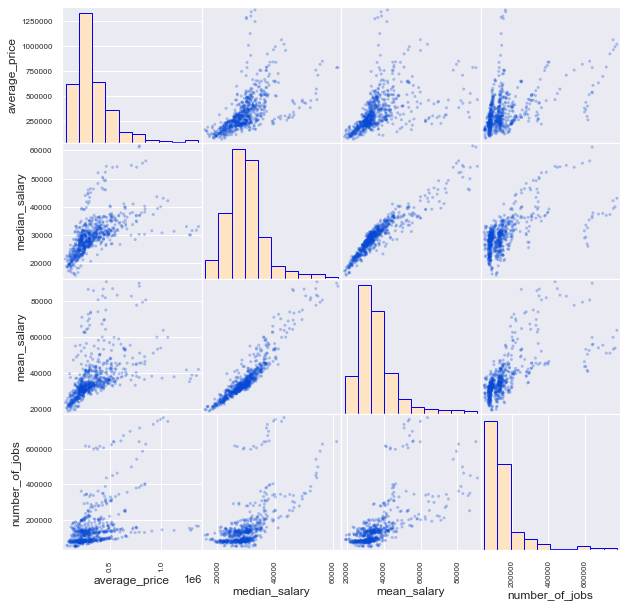

In [32]:
#find linear relationship using scatter plot
#import library
from pandas.plotting import scatter_matrix 
col = ['average_price', 'median_salary', 'mean_salary', 'number_of_jobs']

#show figure
scatter_matrix(london_ds_final[col], figsize = (10, 10), color = '#0649d5', alpha = 0.3, 
               hist_kwds = {'color':['bisque'], 'edgecolor': 'blue'});

In [ ]:
#END